## Import Required Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

## load Dataset

In [1]:
excel_file = 'SupplyChainEmisionFactorsForIndustriesCommodities.xlsx'
years = range(2010, 2017)

In [2]:
years[0]

2010

In [8]:
ds_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
ds_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [10]:
ds_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
ds_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [21]:
all_data = []

for year in years:
    try:
        ds_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        ds_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        ds_com['Source'] = 'Commodity'
        ds_ind['Source'] = 'Industry'
        ds_com['Year'] = ds_ind['Year'] = year

        ds_com.columns = ds_com.columns.str.strip()
        ds_ind.columns = ds_ind.columns.str.strip()

        ds_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace= True)

        ds_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([ds_com, ds_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [22]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [23]:
len(all_data)

7

In [25]:
ds = pd.concat(all_data, ignore_index= True)
ds.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [26]:
len(ds)

22092

## Data Preprocessing

In [37]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Code                       22092 non-null  object 
 1   Name                       22092 non-null  object 
 2   Substance                  22092 non-null  object 
 3   Unit                       22092 non-null  object 
 4   EmissionFactor_woMargin    22092 non-null  float64
 5   EmissionMargin             22092 non-null  float64
 6   EmissionFactor_withMargin  22092 non-null  float64
 7   Reliability                22092 non-null  int64  
 8   TemporalCorrelation        22092 non-null  int64  
 9   GeoCorrelation             22092 non-null  int64  
 10  TechCorrelation            22092 non-null  int64  
 11  DataCollection             22092 non-null  int64  
 12  Source                     22092 non-null  object 
 13  Year                       22092 non-null  int

In [38]:
ds.columns

Index(['Code', 'Name', 'Substance', 'Unit', 'EmissionFactor_woMargin',
       'EmissionMargin', 'EmissionFactor_withMargin', 'Reliability',
       'TemporalCorrelation', 'GeoCorrelation', 'TechCorrelation',
       'DataCollection', 'Source', 'Year'],
      dtype='object')

In [27]:
ds.isnull().sum()

Code                                                          0
Name                                                          0
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
dtype: int64

In [30]:
ds.drop(columns=['Unnamed: 7'], inplace=True)

In [39]:
ds.rename(columns={
    'Supply Chain Emission Factors without Margins': 'EmissionFactor_woMargin',
    'Margins of Supply Chain Emission Factors': 'EmissionMargin',
    'Supply Chain Emission Factors with Margins': 'EmissionFactor_withMargin',
    'DQ ReliabilityScore of Factors without Margins': 'Reliability',
    'DQ TemporalCorrelation of Factors without Margins': 'TemporalCorrelation',
    'DQ GeographicalCorrelation of Factors without Margins': 'GeoCorrelation',
    'DQ TechnologicalCorrelation of Factors without Margins': 'TechCorrelation',
    'DQ DataCollection of Factors without Margins': 'DataCollection'
}, inplace=True)

ds.dropna(inplace = True)

In [43]:
ds.head(3)

,Code,Name,Substance,Unit,EmissionFactor_woMargin,EmissionMargin,EmissionFactor_withMargin,Reliability,TemporalCorrelation,GeoCorrelation,TechCorrelation,DataCollection,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,3,1,4,1,Commodity,2010


In [40]:
print(ds['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [44]:
# Replace ambiguous unit with proper one
ds['Unit'] = ds['Unit'].replace('kg/2018 USD, purchaser price', 'kg CO2e/2018 USD, purchaser price')

In [46]:
print(ds['Unit'].value_counts())

Unit
kg CO2e/2018 USD, purchaser price    22092
Name: count, dtype: int64


In [35]:
ds['Year'].value_counts().sort_index()

Year
2010    3156
2011    3156
2012    3156
2013    3156
2014    3156
2015    3156
2016    3156
Name: count, dtype: int64

In [52]:
#  Encode Categorical Features

le_name = LabelEncoder()
le_substance = LabelEncoder()
le_source = LabelEncoder()

ds['Name_encoded'] = le_name.fit_transform(ds['Name'])
ds['Substance_encoded'] = le_substance.fit_transform(ds['Substance'])
ds['Source_encoded'] = le_source.fit_transform(ds['Source'])


In [53]:
# Normalize/Scale Numerical Columns

scaler = StandardScaler()
numerical_cols = [
    'EmissionFactor_woMargin',
    'EmissionMargin',
    'EmissionFactor_withMargin',
    'Reliability',
    'TemporalCorrelation',
    'GeoCorrelation',
    'TechCorrelation',
    'DataCollection'
]

# Create a copy for scaled data
ds_scaled = ds.copy()
ds_scaled[numerical_cols] = scaler.fit_transform(ds[numerical_cols])


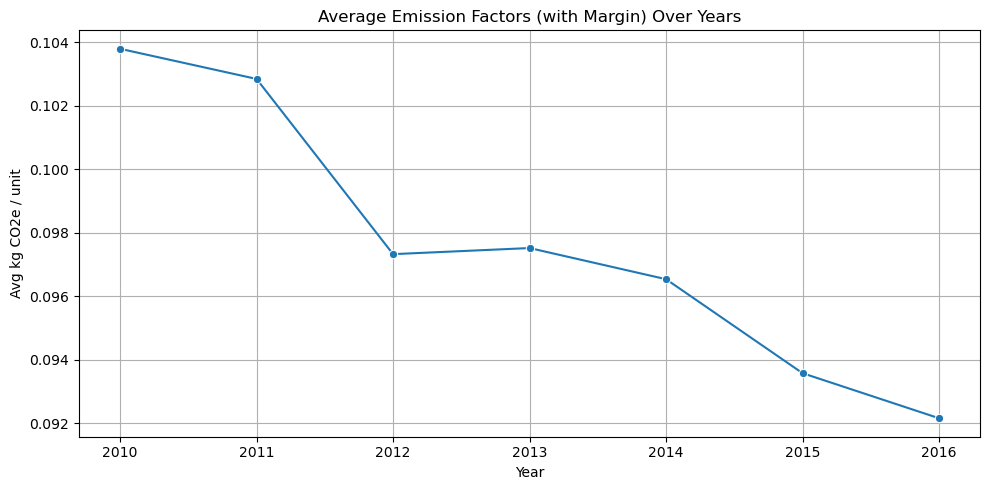

In [51]:
# Average Emission Factors per Year
if 'EmissionFactor_withMargin' in ds.columns:
    yearly_emissions = ds.groupby('Year')['EmissionFactor_withMargin'].mean()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=yearly_emissions.index, y=yearly_emissions.values, marker='o')
    plt.title('Average Emission Factors (with Margin) Over Years')
    plt.ylabel('Avg kg CO2e / unit')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'EmissionFactor_withMargin' not found in dataset.")
